<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_Python/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial W :  0.6476165383469631 0.49159309943874896


Text(0, 0.5, 'Prediction')

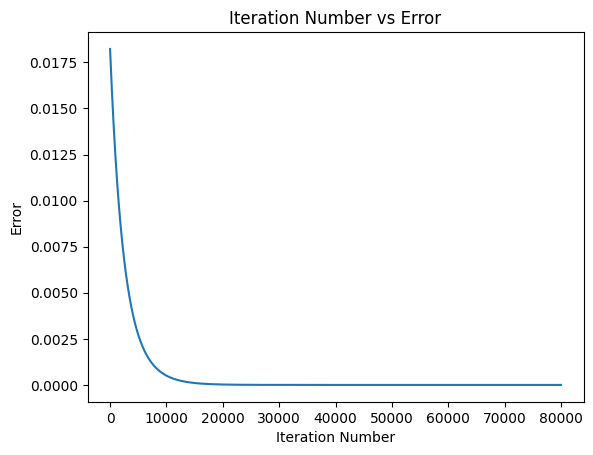

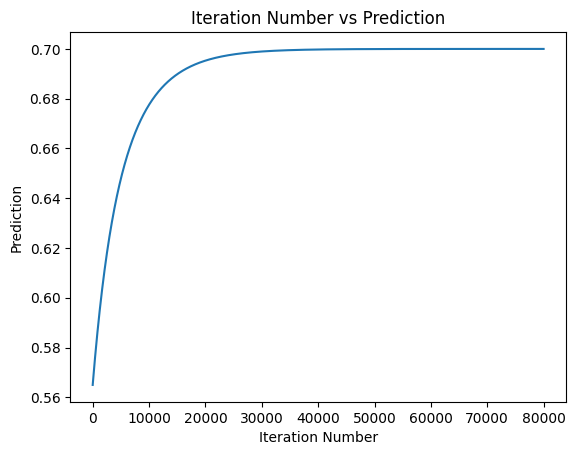

In [ ]:
import numpy
import matplotlib.pyplot

def sigmoid(sop):
    return 1.0/(1+numpy.exp(-1*sop))

def error(predicted, target):
    return numpy.power(predicted-target, 2)

def error_predicted_deriv(predicted, target):
    return 2*(predicted-target)

def sigmoid_sop_deriv(sop):
    return sigmoid(sop)*(1.0-sigmoid(sop))

def sop_w_deriv(x):
    return x

def update_w(w, grad, learning_rate):
    return w - learning_rate*grad

x1=0.1
x2=0.4

target = 0.7
learning_rate = 0.01

w1=numpy.random.rand()
w2=numpy.random.rand()

print("Initial W : ", w1, w2)

predicted_output = []
network_error = []

old_err = 0
for k in range(80000):
    # Forward Pass
    y = w1*x1 + w2*x2
    predicted = sigmoid(y)
    err = error(predicted, target)

    predicted_output.append(predicted)
    network_error.append(err)

    # Backward Pass
    g1 = error_predicted_deriv(predicted, target)

    g2 = sigmoid_sop_deriv(y)

    g3w1 = sop_w_deriv(x1)
    g3w2 = sop_w_deriv(x2)
    # ∂E/W1=∂E/∂Predicted* ∂Predicted/∂s* ∂s/W1
    gradw1 = g3w1*g2*g1
    # ∂EW2=∂E/∂Predicted* ∂Predicted/∂s* ∂s/W2
    gradw2 = g3w2*g2*g1

    w1 = update_w(w1, gradw1, learning_rate)
    w2 = update_w(w2, gradw2, learning_rate)

    # print(predicted)

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(network_error)
matplotlib.pyplot.title("Iteration Number vs Error")
matplotlib.pyplot.xlabel("Iteration Number")
matplotlib.pyplot.ylabel("Error")

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(predicted_output)
matplotlib.pyplot.title("Iteration Number vs Prediction")
matplotlib.pyplot.xlabel("Iteration Number")
matplotlib.pyplot.ylabel("Prediction")


### Understanding the Derivatives in Backpropagation

In the provided code, backpropagation is used to update the weights of a simple neural network. This involves calculating the gradient of the error with respect to the weights. The chain rule of calculus is applied here.

The overall gradient ∂E/∂w (Error with respect to weight) is broken down into three parts:

$$\frac{\partial E}{\partial w} = \frac{\partial E}{\partial \text{predicted}} \times \frac{\partial \text{predicted}}{\partial \text{sop}} \times \frac{\partial \text{sop}}{\partial w}$$

Let's look at each component:

#### 1. Derivative of the Error with respect to the Predicted Output

**Error Function (Mean Squared Error):**
$E = (\text{predicted} - \text{target})^2$

**Derivative:**
$\frac{\partial E}{\partial \text{predicted}} = \frac{\partial}{\partial \text{predicted}} (\text{predicted} - \text{target})^2$
$= 2 \times (\text{predicted} - \text{target})$

**Implementation in Python:**
This derivative is implemented in the `error_predicted_deriv` function within your code:
```python
def error_predicted_deriv(predicted, target):
    return 2*(predicted-target)
```

#### 2. Derivative of the Sigmoid Activation Function with respect to its input (sop - sum of products)

**Sigmoid Function:**
$\text{predicted} = \sigma(\text{sop}) = \frac{1}{1 + e^{-\text{sop}}}$

**Derivative:**
$\frac{\partial \text{predicted}}{\partial \text{sop}} = \frac{\partial}{\partial \text{sop}} \left( \frac{1}{1 + e^{-\text{sop}}} \right)$
$= \frac{e^{-\text{sop}}}{(1 + e^{-\text{sop}})^2}$
This can be rewritten in terms of the sigmoid function itself:
$= \sigma(\text{sop}) \times (1 - \sigma(\text{sop}))$

**Implementation in Python:**
This derivative is implemented in the `sigmoid_sop_deriv` function:
```python
def sigmoid_sop_deriv(sop):
    return sigmoid(sop)*(1.0-sigmoid(sop))
```

#### 3. Derivative of the Sum of Products (sop) with respect to a Weight

**Sum of Products (input to activation function):**
$\text{sop} = w_1 x_1 + w_2 x_2$

**Derivative with respect to $w_1$:**
$\frac{\partial \text{sop}}{\partial w_1} = \frac{\partial}{\partial w_1} (w_1 x_1 + w_2 x_2)$
$= x_1$

**Derivative with respect to $w_2$:**
$\frac{\partial \text{sop}}{\partial w_2} = \frac{\partial}{\partial w_2} (w_1 x_1 + w_2 x_2)$
$= x_2$

**Implementation in Python:**
This is a simple linear derivative, represented by `sop_w_deriv` which just returns the input `x` (which is `x1` or `x2` depending on the weight being updated):
```python
def sop_w_deriv(x):
    return x
```

Combining these derivatives using the chain rule gives you `gradw1` and `gradw2`, which are then used to update the weights (`w1`, `w2`) in the `update_w` function during each iteration of the training loop.